In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

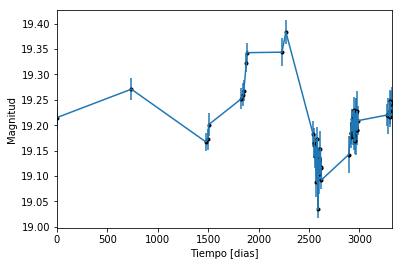

In [2]:
data = np.genfromtxt('LC_18822_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

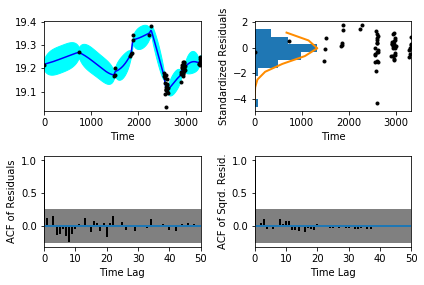

In [5]:
sample.assess_fit()

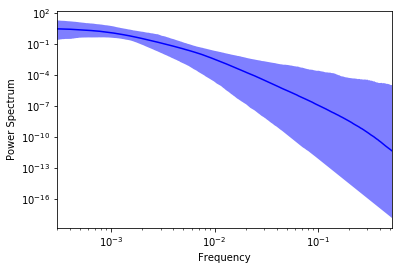

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0525109,'Medida del nivel de ruido')

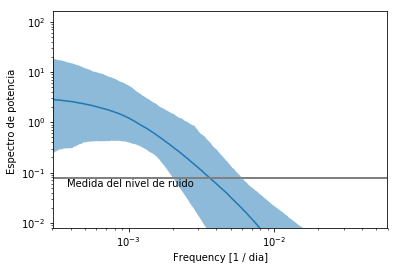

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

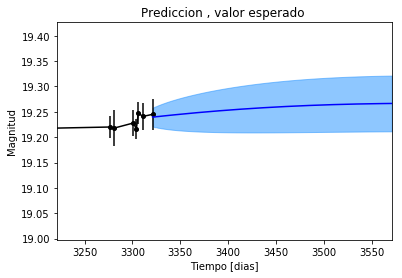

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

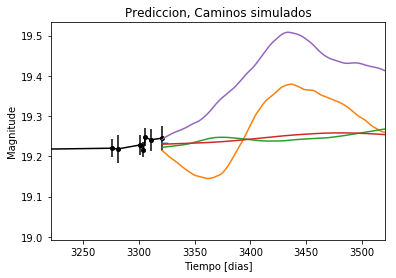

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


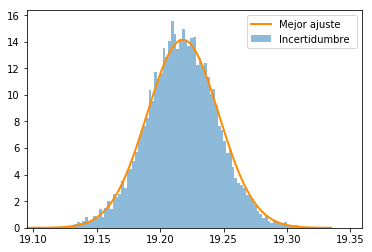

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

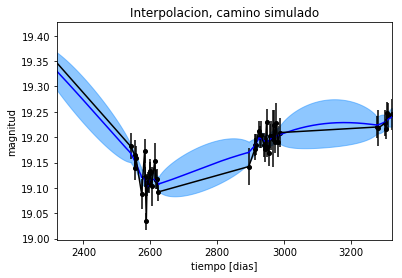

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

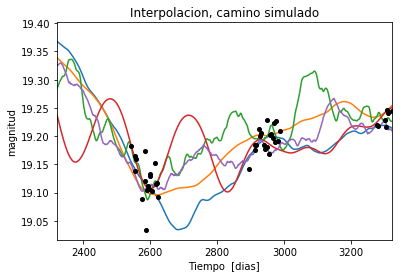

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 735.944082961
Median: 0.0109992552469
Standard deviation: 0.191130594916
68% credibility interval: [ 0.00090169  0.17394622]
95% credibility interval: [  3.56346120e-04   7.39894692e-01]
99% credibility interval: [  3.14596842e-04   9.96998088e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 449.762220764
Median: 0.00277589654749
Standard deviation: 0.101671598723
68% credibility interval: [ 0.00057541  0.04034541]
95% credibility interval: [  3.36252097e-04   3.37459531e-01]
99% credibility interval: [  3.10457537e-04   7.00775035e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 341.642550389
Median: 0.0153640071445


In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 695.224809712
Median: 0.0271546944188
Standard deviation: 0.26686092765
68% credibility interval: [ 0.          0.44180972]
95% credibility interval: [ 0.         0.9225415]
99% credibility interval: [ 0.          1.02341053]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 695.224809712
Median: 0.0271546944188
Standard deviation: 0.26686092765
68% credibility interval: [ 0.          0.44180972]
95% credibility interval: [ 0.         0.9225415]
99% credibility interval: [ 0.          1.02341053]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1383.74417136
Median: 0.0
Standard deviation: 0.000588438259077
68% credibil

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 531.750723331
Median: 134.570174691
Standard deviation: 1.67027089239
68% credibility interval: [ 132.83243204  135.71415458]
95% credibility interval: [ 130.29363005  137.18261978]
99% credibility interval: [ 128.36066339  138.46361874]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 488.747210432
Median: 0.632681791522
Standard deviation: 2.31101586759
68% credibility interval: [ 0.0592254   3.91865106]
95% credibility interval: [ 0.01547946  7.90352865]
99% credibility interval: [  9.90562363e-03   1.20118287e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 396.111134163
Median: 0.734927921929
Standard deviation: 10.5413970031
68% credibility interval: [  0.02475462  10.90697707]
95% credibility interval: [  1

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 992.694696006
Median: 3.49203115089e-47
Standard deviation: 2.09972156937e+33
68% credibility interval: [  1.77344000e-113   1.77956373e-011]
95% credibility interval: [  4.62480512e-217   1.71372791e+027]
99% credibility interval: [  5.35343115e-224   1.82403312e+033]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3578.51589984
Median: 19.234098019
Standard deviation: 0.0416972048168
68% credibility interval: [ 19.19886679  19.26830279]
95% credibility interval: [ 19.15239859  19.31814012]
99% credibility interval: [ 19.09096368  19.37040596]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 695.224809712
Median: 0.0271546944188
Standard deviation: 0.26686092765
68% credibility interval: [ 0.          0.44180972]
95% credibility interval: [ 0.         0.9225415]
99% credibility interval: [ 0.          1.02341053]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 695.224809712
Median: 0.0271546944188
Standard deviation: 0.26686092765
68% credibility interval: [ 0.          0.44180972]
95% credibility interval: [ 0.         0.9225415]
99% credibility interval: [ 0.          1.02341053]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1383.74417136
Median: 0.0
Standard deviation: 0.000588438259077
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 531.750723331
Median: 134.570174691
Standard deviation: 1.67027089239
68% credibility interval: [ 132.83243204  135.71415458]
95% credibility interval: [ 130.29363005  137.18261978]
99% credibility interval: [ 128.36066339  138.46361874]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1760.94400248
Median: 0.00746633403216
Standard deviation: 0.00958181245903
68% credibility interval: [ 0.00445237  0.0141326 ]
95% credibility interval: [ 0.00285658  0.03192163]
99% credibility interval: [ 0.00228584  0.05781511]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1393.02868685
Median: 1.04164941906
Standard deviation: 0.175023214628
68% credibility interval: [ 0.88777843  1.22386709]
95% credibility interval: [ 0.74736459  1.43592628]
99% credibility interval: [ 0.65796616  1.59665505]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 344.202586773
Median: 0.000119639423185
Standard deviation: 0.0956671418901
68% credibility interval: [  6.03383488e-07   4.51612294e-03]
95% credibility interval: [  2.96931410e-31   2.38726679e-01]
99% credibility interval: [  2.49047445e-37   7.35084367e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 735.944082961
Median: (-0.0691103589573-3.89935759063j)
Standard deviation: 2.06243257389
68% credibility interval: [-1.09293631-0.56960328j -0.00566548-0.02329738j]
95% credibility interval: [ -4.64889546e+00+0.j          -2.23898870e-03-1.05535263j]
99% credibility interval: [ -6.26432374e+00+0.j          -1.97667025e-03-0.08608694j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 449.762220764
Median: (-0.0174414724015+0.14528188118j)
Standard deviation: 1.79430731166
68% credibility interval: [-0.25349768+4.2681464j  -0.00361542+0.31579402j]
95% credibility interval: [ -2.12032077e+00+4.14631288j  -2.11273424e-03+0.j        ]
99% credibility interval: [ -4.40309940e+00+1.35331515j  -1.95066223e-03+0.j        ]
Post